# Imports

In [1]:
# !pip install openml

# Libraries

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Working with files
import os
import glob
import io


# Working with OpenML dataset
import openml
from openml.datasets import edit_dataset, fork_dataset, get_dataset

# Import Data

In [3]:
# Download dataset based on OpenML dataset ID

# Name = Crimes-in-Los-angeles-from-2010 
# ID = 43579
# URL = https://www.openml.org/search?type=data&sort=runs&status=active&id=43579

dataset = openml.datasets.get_dataset(43579)

# Print a summary
print(
        f"This is dataset '{dataset.name}', the target feature is "
        f"'{dataset.default_target_attribute}'"
     )

print(f"URL: {dataset.url}")
print(dataset.description[:500])

This is dataset 'Crimes-in-Los-angeles-from-2010', the target feature is 'None'
URL: https://api.openml.org/data/v1/download/22102404/Crimes-in-Los-angeles-from-2010.arff
This dataset reflects incidents of crime in the City of Los Angeles dating back to 2010. This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. Some location fields with missing data are noted as (0, 0). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database.
This data was taken from data.gov(https://catalog.data.gov/dataset


C:\Users\bianc\anaconda3\lib\site-packages\openml\datasets\functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [4]:
# Get the actual data (pandas dataframe and uninteresting metadata)

big_df, *_ = dataset.get_data()
print(f"The lenght of the '{dataset.name}' is = {len(big_df)}")
print(f"The number of features for the '{dataset.name}' is = {len(big_df.columns)}")
big_df.head()

The lenght of the 'Crimes-in-Los-angeles-from-2010' is = 1692056
The number of features for the 'Crimes-in-Los-angeles-from-2010' is = 26


,DR_Number,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District,Crime_Code,Crime_Code_Description,MO_Codes,...,Weapon_Description,Status_Code,Status_Description,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Address,Cross_Street,Location_
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,None,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,None,...,None,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,None,...,None,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,None,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,None,...,None,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR (399 OR UNDER),0329,...,None,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,None,"(34.2009, -118.6369)"


In [5]:
big_df.dtypes

DR_Number                   int64
Date_Reported              object
Date_Occurred              object
Time_Occurred               int64
Area_ID                     uint8
Area_Name                  object
Reporting_District          int64
Crime_Code                  int64
Crime_Code_Description     object
MO_Codes                   object
Victim_Age                float64
Victim_Sex                 object
Victim_Descent             object
Premise_Code              float64
Premise_Description        object
Weapon_Used_Code          float64
Weapon_Description         object
Status_Code                object
Status_Description         object
Crime_Code_1              float64
Crime_Code_2              float64
Crime_Code_3              float64
Crime_Code_4              float64
Address                    object
Cross_Street               object
Location_                  object
dtype: object

In [6]:
# Checking for each column the type and the number of distinct and similar values (also see if there are missing values)

for col in big_df.columns:
    print(col)
    print(big_df[col].value_counts())
    print(f"Number of missing values = {big_df[col].isna().sum()}")
    print(f"Type of dataframe column = {big_df[col].dtypes}")
    print('\n')

DR_Number
1208575      1
151421981    1
151421994    1
151421993    1
151421992    1
            ..
120619874    1
120619863    1
120619861    1
120619860    1
182106659    1
Name: DR_Number, Length: 1692056, dtype: int64
Number of missing values = 0
Type of dataframe column = int64


Date_Reported
08/07/2017    805
12/18/2017    794
07/24/2017    783
10/23/2017    771
01/29/2018    763
             ... 
02/22/2018    327
01/01/2010    324
12/25/2010    308
02/23/2018    197
02/24/2018     54
Name: Date_Reported, Length: 2977, dtype: int64
Number of missing values = 0
Type of dataframe column = object


Date_Occurred
01/01/2010    2155
01/01/2011    2072
01/01/2012    1670
01/01/2013    1489
01/01/2014    1354
              ... 
02/09/2013     389
02/21/2018     317
02/22/2018     185
02/23/2018     110
02/24/2018      17
Name: Date_Occurred, Length: 2977, dtype: int64
Number of missing values = 0
Type of dataframe column = object


Time_Occurred
1200    93904
1800    50313
2000    470

6TH                          ST             3908
7TH                          ST             3024
9300    TAMPA                        AV     2879
6TH                                         2428
5TH                          ST             2418
                                            ... 
2700    SUNSET                       BL        1
RUSSELL                      ST                1
KILBOURN                                       1
9500    SOUTHWESTERN                 AV        1
23900    SCHOENBORN                   ST       1
Name: Address, Length: 71877, dtype: int64
Number of missing values = 0
Type of dataframe column = object


Cross_Street
BROADWAY                           4942
FIGUEROA                           2985
VERMONT                      AV    2974
WESTERN                      AV    2835
SAN PEDRO                          2831
                                   ... 
LA VALLE                     ST       1
TRUMAN                       ST       1
TYLER               

### Filter dataframe for years 2010-2017 (2018 is not a full year)

In [7]:
# Convert 'date_reported' to a datetime object
big_df['Date_Reported_format'] = pd.to_datetime(big_df['Date_Reported'], format = '%m/%d/%Y')

# Filter the DataFrame to include only years from 2010 to 2017
start_year = 2010
end_year = 2017

big_df = big_df[(big_df['Date_Reported_format'].dt.year >= start_year) & (big_df['Date_Reported_format'].dt.year <= end_year)]

big_df

,DR_Number,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District,Crime_Code,Crime_Code_Description,MO_Codes,...,Status_Code,Status_Description,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Address,Cross_Street,Location_,Date_Reported_format
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,None,"(33.9829, -118.3338)",2013-03-14
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,None,...,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",2010-01-25
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,None,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,None,"(33.942, -118.2717)",2013-03-19
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,None,...,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",2010-11-11
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR (399 OR UNDER),0329,...,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,None,"(34.2009, -118.6369)",2014-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690015,181405426,12/18/2017,11/22/2017,30,14,Pacific,1494,440,THEFT PLAIN - PETTY (950 UNDER),1822 0344,...,IC,Invest Cont,440.0,NaN,NaN,NaN,300 WORLD WY,None,"(33.944, -118.4073)",2017-12-18
1690055,181406163,12/22/2017,12/17/2017,1,14,Pacific,1431,121,"RAPE, FORCIBLE",0500 0507,...,IC,Invest Cont,121.0,NaN,NaN,NaN,1500 OCEAN FRONT WK,None,"(33.9875, -118.4741)",2017-12-22
1690608,181600638,02/15/2016,02/15/2016,1910,16,Foothill,1655,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0913 0319 0601 0334 1420 0444 1419 0421,...,IC,Invest Cont,230.0,NaN,NaN,NaN,9900 SUNLAND BL,None,"(34.2562, -118.3588)",2016-02-15
1691488,181906612,05/29/2017,05/21/2017,2000,19,Mission,1969,626,INTIMATE PARTNER - SIMPLE ASSAULT,0400 0401 1243 1300 2000,...,AO,Adult Other,626.0,NaN,NaN,NaN,GOLDEN STATE FY,OSBORNE,"(34.2448, -118.4227)",2017-05-29


# Preprocesing

## Missing Values 

## Distribution

## Dates by years

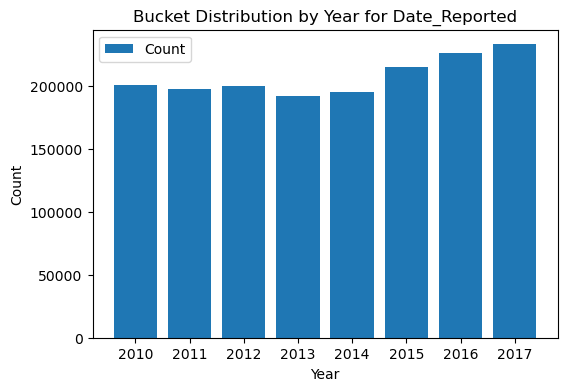

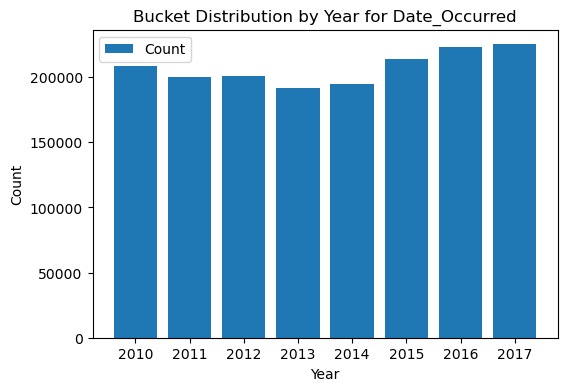

In [8]:
# Distribution for datetime type columns 

datetime_fields = ['Date_Reported', 'Date_Occurred']
datetime_df = big_df.copy()

for field in datetime_fields:
    datetime_df[field] = pd.to_datetime(datetime_df[field])
    datetime_df[field + '_year'] = datetime_df[field].dt.year
    
    result = datetime_df.groupby(field + '_year')[field].agg(['count', 'mean']).reset_index()
    
    # Plotting the data
    plt.figure(figsize = (6, 4))
    plt.bar(result[field + '_year'], result['count'], label = 'Count')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'Bucket Distribution by Year for {field}')
    plt.legend()
#     plt.xlim([2010, 2017]) # 2018 is not a full year
    plt.show()
    

## Dates by hours

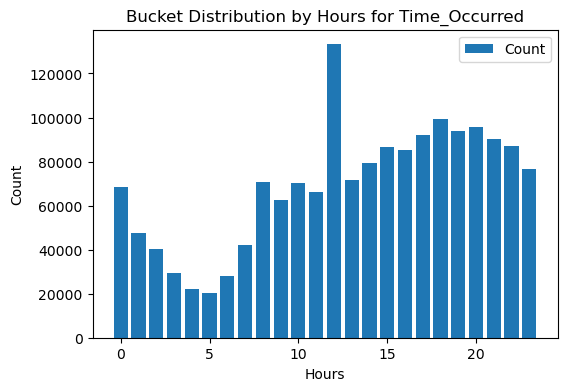

In [9]:
# Distribution for time type columns 

def extract_hour(time_str):
    time_str = str(time_str)
    time_str = time_str.zfill(4)  # Ensure at least 4 digits
    hour_str = time_str[:2]
    return int(hour_str)


datetime_fields = ['Time_Occurred']
datetime_df = big_df.copy()

for field in datetime_fields:
    datetime_df[field + '_hour'] = datetime_df[field].apply(extract_hour)
    
    result = datetime_df.groupby(field + '_hour')[field].agg(['count', 'mean']).reset_index()
    
    # Plotting the data
    plt.figure(figsize = (6, 4))
    plt.bar(result[field + '_hour'], result['count'], label = 'Count')
    plt.xlabel('Hours')
    plt.ylabel('Count')
    plt.title(f'Bucket Distribution by Hours for {field}')
    plt.legend()
    plt.show()
    

## Dates by months

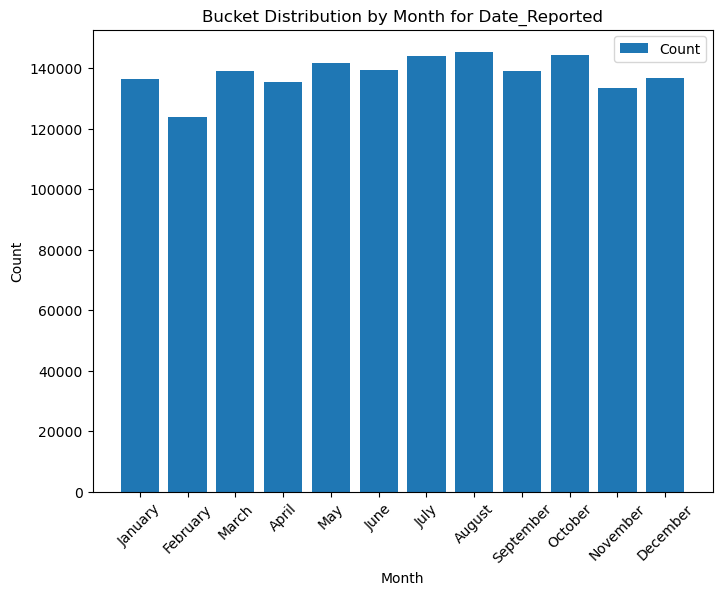

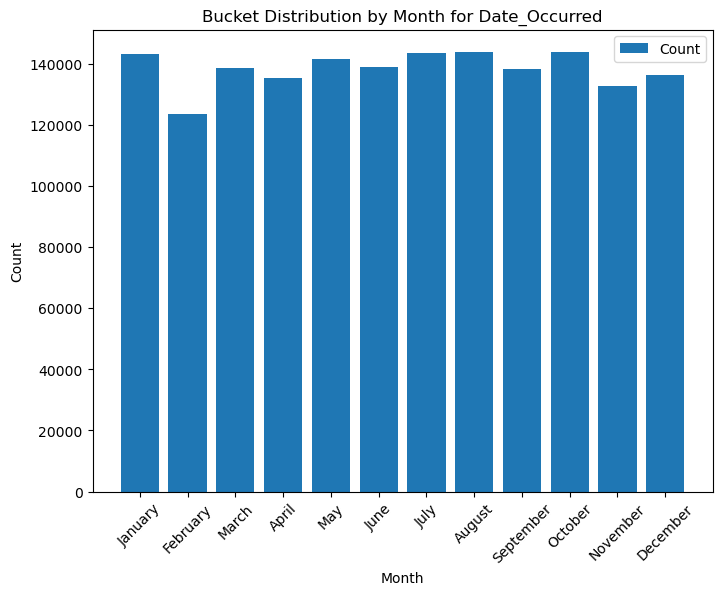

In [10]:
import matplotlib.pyplot as plt

datetime_fields = ['Date_Reported', 'Date_Occurred']
datetime_df = big_df.copy()

# Dictionary to map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }

for field in datetime_fields:
    datetime_df[field] = pd.to_datetime(datetime_df[field])
    datetime_df[field + '_month'] = datetime_df[field].dt.month

    result = datetime_df.groupby(field + '_month')[field].agg(['count', 'mean']).reset_index()

    # Map month numbers to month names
    result[field + '_month'] = result[field + '_month'].map(month_names)
    
    # Plotting the data
    plt.figure(figsize=(8, 6))
    plt.bar(result[field + '_month'], result['count'], label='Count')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title(f'Bucket Distribution by Month for {field}')
    plt.legend()
    plt.xticks(rotation = 45)
    plt.show()


## Area_Name, Victim_Sex, Victim_Descent, Status_Description

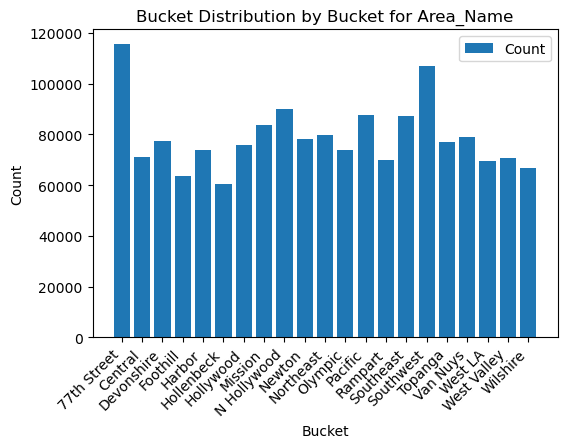

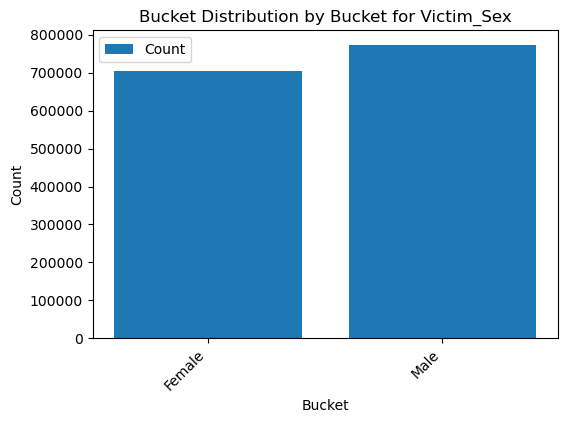

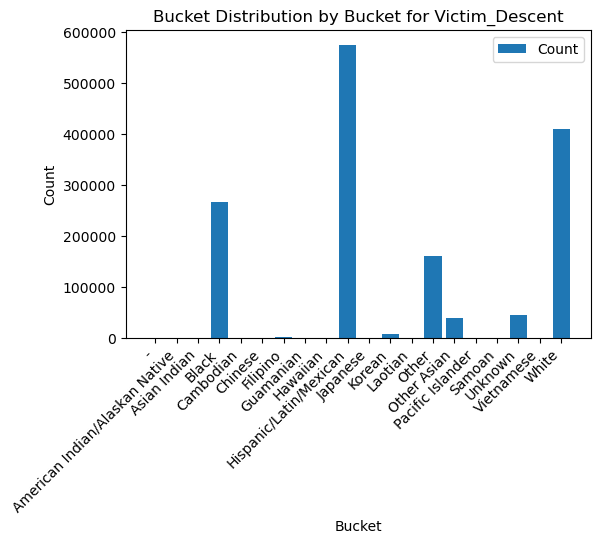

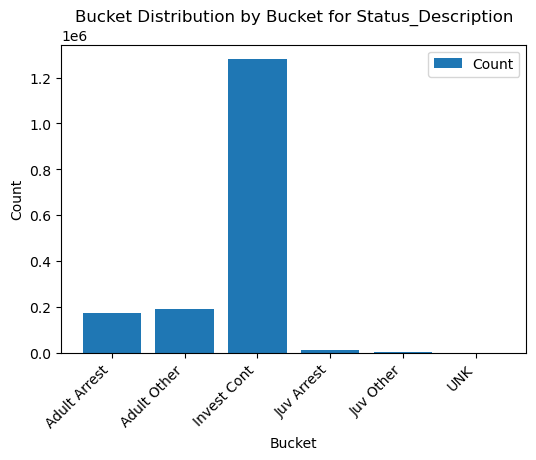

In [11]:
# Distribution for numerical values - reduced number 
# Area_IDs varying form 1 to 21

datetime_fields = ['Area_Name', 'Victim_Sex', 'Victim_Descent', 'Status_Description']
datetime_df = big_df.copy()

for field in datetime_fields:
    datetime_df = big_df.copy()
    
    if field == 'Victim_Descent':
        
        # Transforming victim's ethnicity code into whole word

        mapped_descents = {'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian', 'F': 'Filipino', 
                           'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican', 'I': 'American Indian/Alaskan Native', 
                           'J': 'Japanese', 'K': 'Korean', 'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander', 
                           'S': 'Samoan', 'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 
                           'Z': 'Asian Indian'}

        datetime_df['Victim_Descent_New'] = datetime_df['Victim_Descent']
        datetime_df['Victim_Descent_New'] = datetime_df['Victim_Descent_New'].replace(mapped_descents)
        
        datetime_df['Victim_Descent_New' + '_bucket'] = datetime_df['Victim_Descent_New']

        result = datetime_df.groupby('Victim_Descent_New' + '_bucket')['Victim_Descent_New'].agg(['count']).reset_index()

        # Plotting the data
        plt.figure(figsize = (6, 4))
        plt.bar(result['Victim_Descent_New' + '_bucket'], result['count'], label = 'Count')
        plt.xlabel('Bucket')
        plt.xticks(result['Victim_Descent_New' + '_bucket'], result['Victim_Descent_New' + '_bucket'], rotation = 45, ha = 'right')
        plt.ylabel('Count')
        plt.title(f'Bucket Distribution by Bucket for {field}')
        plt.legend()
        plt.show()
        
    elif field == 'Victim_Sex':
        
        # Transforming victim's gender code into whole word
        
        gender = ['F', 'M']
        datetime_df = datetime_df[datetime_df['Victim_Sex'].isin(gender)]
        mapped_gender = {'F': 'Female', 'M': 'Male'}

        datetime_df['Victim_Sex_New'] = datetime_df['Victim_Sex']
        datetime_df['Victim_Sex_New'] = datetime_df['Victim_Sex_New'].replace(mapped_gender)
        
        datetime_df['Victim_Sex_New' + '_bucket'] = datetime_df['Victim_Sex_New']

        result = datetime_df.groupby('Victim_Sex_New' + '_bucket')['Victim_Sex_New'].agg(['count']).reset_index()

        # Plotting the data
        plt.figure(figsize = (6, 4))
        plt.bar(result['Victim_Sex_New' + '_bucket'], result['count'], label = 'Count')
        plt.xlabel('Bucket')
        plt.xticks(result['Victim_Sex_New' + '_bucket'], result['Victim_Sex_New' + '_bucket'], rotation = 45, ha = 'right')
        plt.ylabel('Count')
        plt.title(f'Bucket Distribution by Bucket for {field}')
        plt.legend()
        plt.show()
    
    else:
        datetime_df[field + '_bucket'] = datetime_df[field]

        result = datetime_df.groupby(field + '_bucket')[field].agg(['count']).reset_index()

        # Plotting the data
        plt.figure(figsize = (6, 4))
        plt.bar(result[field + '_bucket'], result['count'], label = 'Count')
        plt.xlabel('Bucket')
        plt.xticks(result[field + '_bucket'], result[field + '_bucket'], rotation = 45, ha = 'right')
        plt.ylabel('Count')
        plt.title(f'Bucket Distribution by Bucket for {field}')
        plt.legend()
        plt.show()
    
    
        
    

## Victim_Age

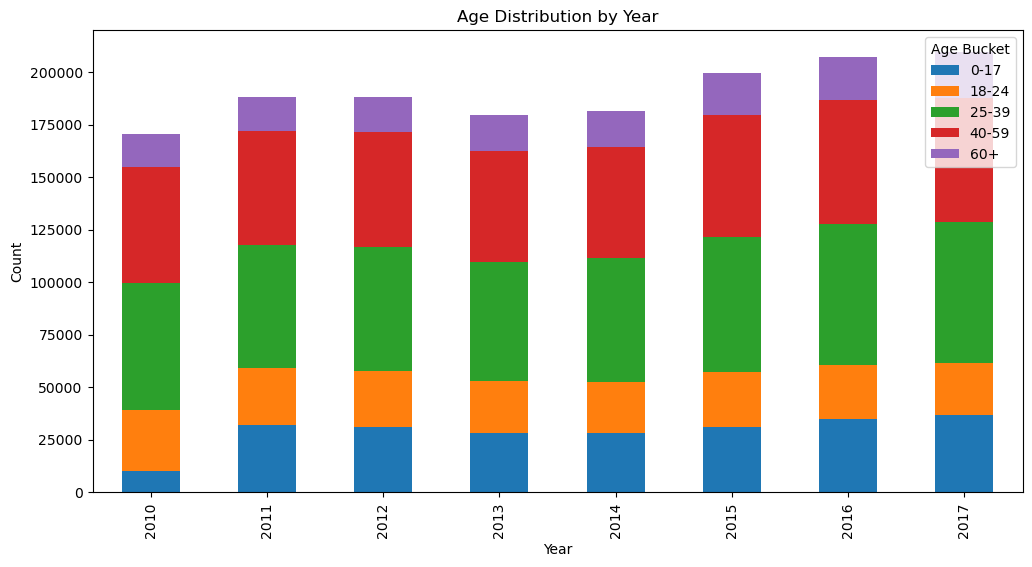

In [12]:
datetime_df = big_df.copy()

# Define age buckets
age_bins = [0, 18, 25, 40, 60, 120]
age_labels = ['0-17', '18-24', '25-39', '40-59', '60+']

# Create a new column 'Age_Bucket' in the DataFrame
datetime_df['Age_Bucket'] = pd.cut(datetime_df['Victim_Age'], bins=age_bins, labels=age_labels, right=False)

# Adding year as a column
datetime_df['Date_Occurred_year'] = pd.to_datetime(datetime_df['Date_Occurred']).dt.year



# Group by 'Date_Occurred_year' and 'Age_Bucket' to get counts
age_by_year = datetime_df.groupby(['Date_Occurred_year', 'Age_Bucket']).size().unstack(fill_value=0)

# Plot age groups
age_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Age Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Age Bucket")
# plt.xlim([2010, 2017]) # 2018 is not a full year
plt.show()

## Weapon_Description

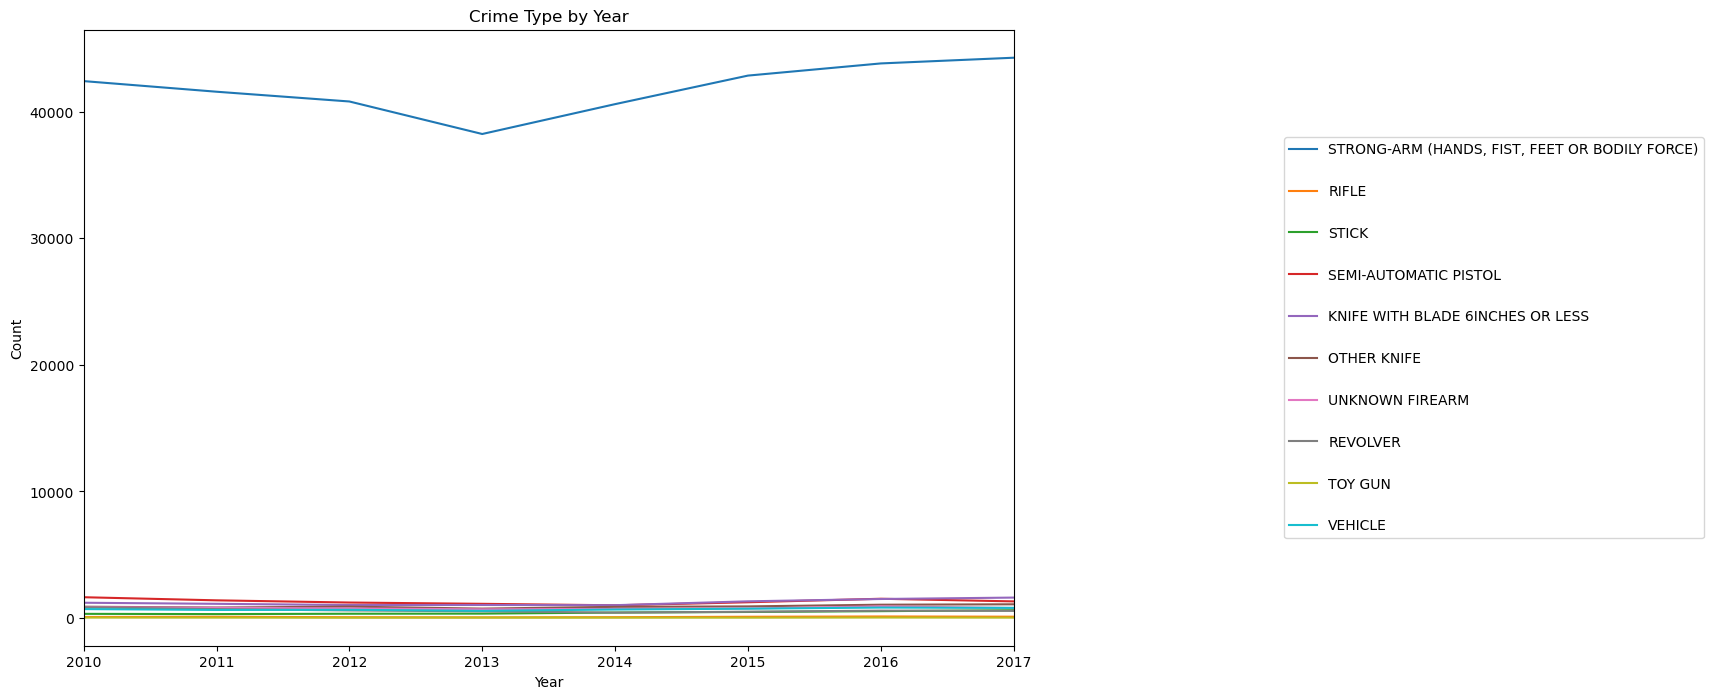

In [13]:
datetime_df = big_df.copy()

# Adding year as a column
datetime_df['Date_Occurred_year'] = pd.to_datetime(datetime_df['Date_Occurred']).dt.year

# Group by 'Crime_Code_Description' and 'Date_Occurred_year' to get the count
crime_by_year = datetime_df.groupby(['Date_Occurred_year', 'Weapon_Description']).size().unstack(fill_value=0)

# Specify the crime types you want to include in the chart
crime_types = ['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'RIFLE', 'STICK', 'SEMI-AUTOMATIC PISTOL', 
               'KNIFE WITH BLADE 6INCHES OR LESS', 'OTHER KNIFE', 'UNKNOWN FIREARM', 'REVOLVER', 'TOY GUN', 'VEHICLE']


# Filter the data for the selected crime types
crime_by_year = crime_by_year[crime_types]

# Plot the data
plt.figure(figsize = (12, 8))
for crime_type in crime_by_year.columns:
    plt.plot(crime_by_year.index, crime_by_year[crime_type], label = crime_type)

plt.title("Crime Type by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(loc='center right', bbox_to_anchor = (1.75, 0.5), ncol = 1, labelspacing = 2)

plt.xlim([2010, 2017]) # 2018 is not a full year
plt.show()

### Weapon_Description without the most used weapon

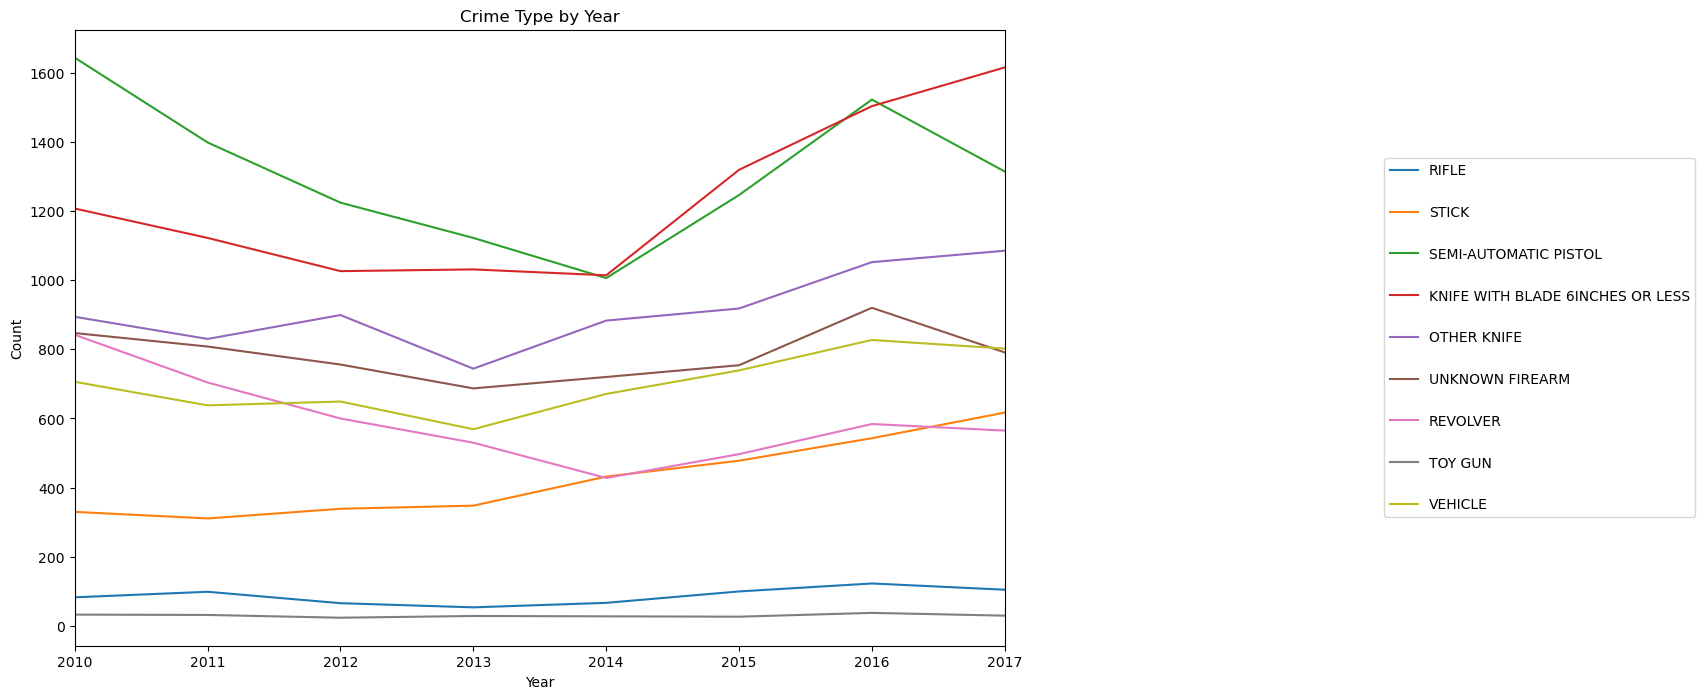

In [14]:
datetime_df = big_df.copy()

# Adding year as a column
datetime_df['Date_Occurred_year'] = pd.to_datetime(datetime_df['Date_Occurred']).dt.year

# Group by 'Crime_Code_Description' and 'Date_Occurred_year' to get the count
crime_by_year = datetime_df.groupby(['Date_Occurred_year', 'Weapon_Description']).size().unstack(fill_value=0)

# Specify the crime types you want to include in the chart
crime_types = ['RIFLE', 'STICK', 'SEMI-AUTOMATIC PISTOL', 
               'KNIFE WITH BLADE 6INCHES OR LESS', 'OTHER KNIFE', 'UNKNOWN FIREARM', 'REVOLVER', 'TOY GUN', 'VEHICLE']


# Filter the data for the selected crime types
crime_by_year = crime_by_year[crime_types]

# Plot the data
plt.figure(figsize = (12, 8))
for crime_type in crime_by_year.columns:
    plt.plot(crime_by_year.index, crime_by_year[crime_type], label = crime_type)

plt.title("Crime Type by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(loc='center right', bbox_to_anchor = (1.75, 0.5), ncol = 1, labelspacing = 2)

plt.xlim([2010, 2017]) # 2018 is not a full year
plt.show()

In [15]:
crime_by_year = datetime_df.groupby(['Weapon_Description', 'Date_Occurred_year']).count()['DR_Number'].sort_values(ascending=False)

# Access 'Crime_Code_Description' values and sort them by count in descending order
crime_types_by_count = crime_by_year.index.get_level_values('Weapon_Description').value_counts().sort_values(ascending=False)

print(crime_types_by_count.head(10))


STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    8
HAND GUN                                          8
FIXED OBJECT                                      8
VEHICLE                                           8
BOTTLE                                            8
BLUNT INSTRUMENT                                  8
DEMAND NOTE                                       8
RIFLE                                             8
FOLDING KNIFE                                     8
STICK                                             8
Name: Weapon_Description, dtype: int64


## Crime_Code_Description

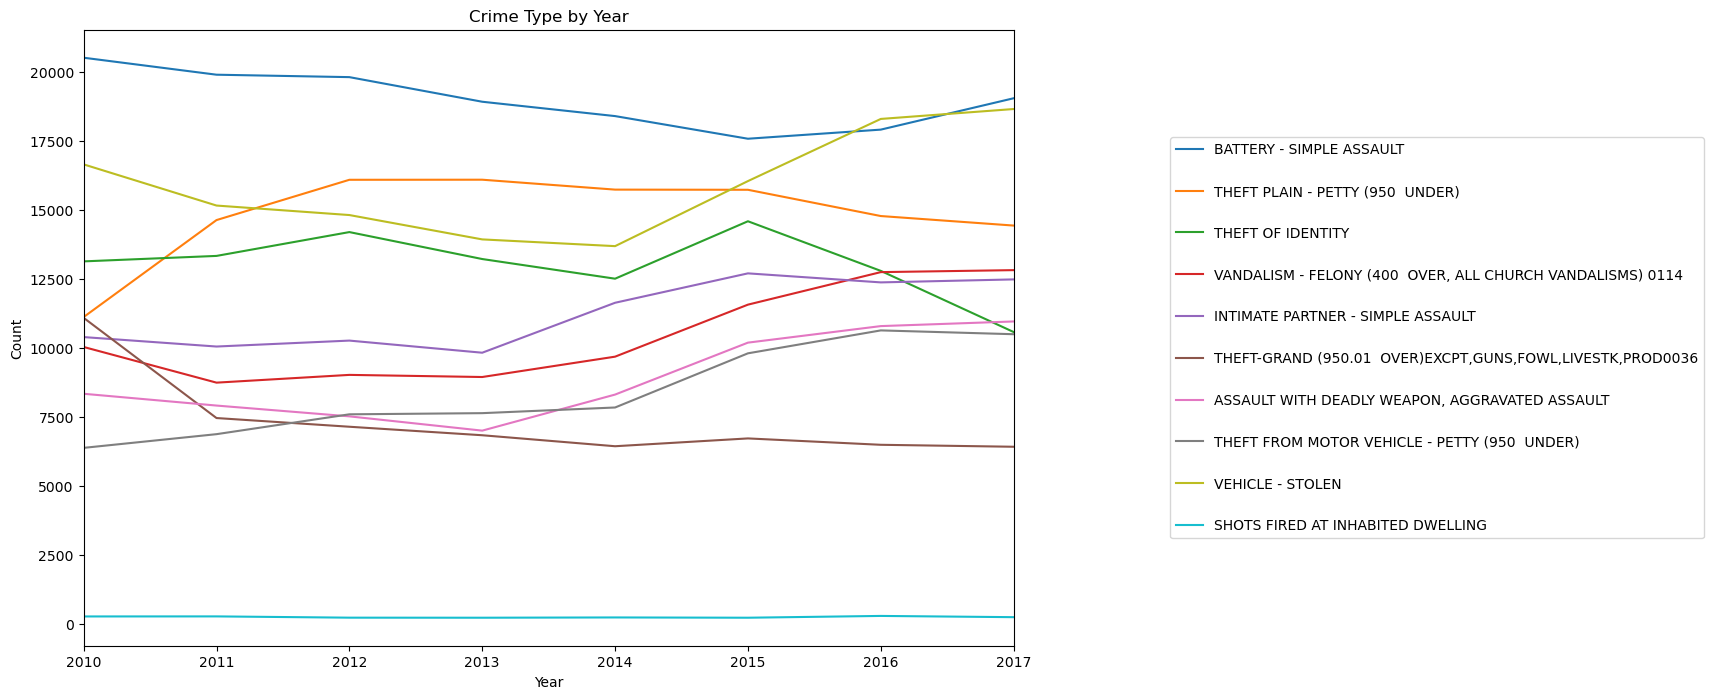

In [16]:
datetime_df = big_df.copy()

# Adding year as a column
datetime_df['Date_Occurred_year'] = pd.to_datetime(datetime_df['Date_Occurred']).dt.year

# Group by 'Crime_Code_Description' and 'Date_Occurred_year' to get the count
crime_by_year = datetime_df.groupby(['Date_Occurred_year', 'Crime_Code_Description']).size().unstack(fill_value=0)

# Specify the crime types you want to include in the chart
crime_types = ['BATTERY - SIMPLE ASSAULT', 'THEFT PLAIN - PETTY (950  UNDER)', 'THEFT OF IDENTITY', 
               'VANDALISM - FELONY (400  OVER, ALL CHURCH VANDALISMS) 0114', 'INTIMATE PARTNER - SIMPLE ASSAULT',
               'THEFT-GRAND (950.01  OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
               'THEFT FROM MOTOR VEHICLE - PETTY (950  UNDER)', 'VEHICLE - STOLEN', 'SHOTS FIRED AT INHABITED DWELLING']


# Filter the data for the selected crime types
crime_by_year = crime_by_year[crime_types]

# Plot the data
plt.figure(figsize = (12, 8))
for crime_type in crime_by_year.columns:
    plt.plot(crime_by_year.index, crime_by_year[crime_type], label = crime_type)

plt.title("Crime Type by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(loc='center right', bbox_to_anchor = (1.75, 0.5), ncol = 1, labelspacing = 2)

plt.xlim([2010, 2017]) # 2018 is not a full year
plt.show()

In [17]:
crime_by_year = datetime_df.groupby(['Crime_Code_Description', 'Date_Occurred_year']).count()['DR_Number'].sort_values(ascending=False)

# Access 'Crime_Code_Description' values and sort them by count in descending order
crime_types_by_count = crime_by_year.index.get_level_values('Crime_Code_Description').value_counts().sort_values(ascending=False)

print(crime_types_by_count.head(10))


BATTERY - SIMPLE ASSAULT                                      8
ATTEMPTED ROBBERY                                             8
THEFT PLAIN - PETTY (950  UNDER)                              8
BURGLARY                                                      8
THEFT OF IDENTITY                                             8
VANDALISM - FELONY (400  OVER, ALL CHURCH VANDALISMS) 0114    8
INTIMATE PARTNER - SIMPLE ASSAULT                             8
THEFT-GRAND (950.01  OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036    8
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                8
THEFT FROM MOTOR VEHICLE - PETTY (950  UNDER)                 8
Name: Crime_Code_Description, dtype: int64


## Dates 

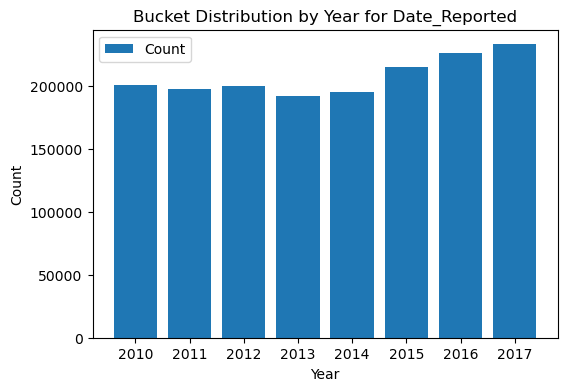

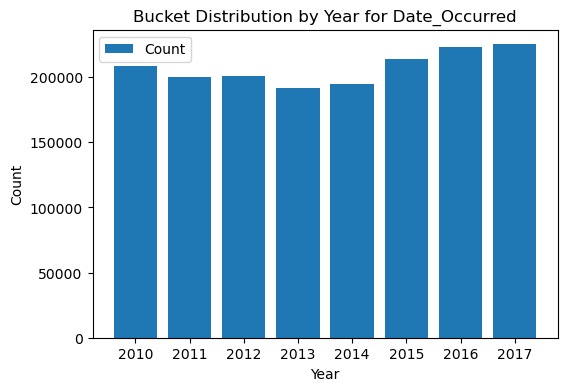

In [18]:
# Distribution for datetime type columns 

datetime_fields = ['Date_Reported', 'Date_Occurred']
datetime_df = big_df.copy()

for field in datetime_fields:
    datetime_df[field] = pd.to_datetime(datetime_df[field])
    datetime_df[field + '_year'] = datetime_df[field].dt.year
    
    result = datetime_df.groupby(field + '_year')[field].agg(['count', 'mean']).reset_index()
    
    # Plotting the data
    plt.figure(figsize = (6, 4))
    plt.bar(result[field + '_year'], result['count'], label = 'Count')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'Bucket Distribution by Year for {field}')
    plt.legend()
    plt.show()
    

## Location

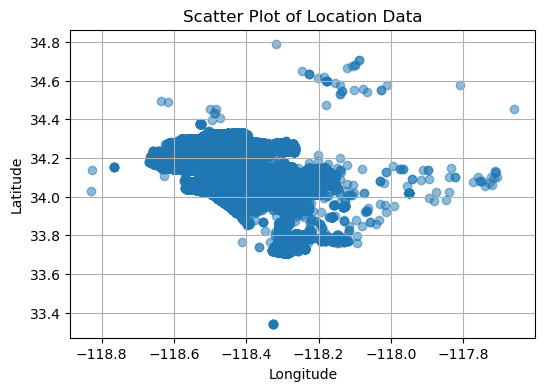

In [19]:
# Distribution for Location type 
# A lot of values with (0, 0) => unknown values theoretically - removed them

def extract_latitude(location_str):
    if location_str is not None:
        if float(location_str.split(',')[0]) != float(0):
            return float(location_str.split(',')[0])
        else: 
            return np.nan
    else:
        return None

def extract_longitude(location_str):
    if location_str is not None:
        if float(location_str.split(',')[1]) != float(0):
            return float(location_str.split(',')[1])
        else: 
            return np.nan
    else:
        return None

datetime_df = big_df.copy()

datetime_df['location'] = datetime_df['Location_'].str.strip('()')
datetime_df['latitude'] = datetime_df['location'].apply(extract_latitude)
datetime_df['longitude'] = datetime_df['location'].apply(extract_longitude)

plt.figure(figsize = (6, 4))
plt.scatter(datetime_df['longitude'], datetime_df['latitude'], marker = 'o', alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Location Data')
plt.grid(True)
plt.show()

# Processing